In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Load the dataset

In [2]:
# https://www.kaggle.com/iabhishekofficial/mobile-price-classification

df = pd.read_csv('csv/train.csv')

In [3]:
df.shape

(2000, 21)

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# check for null values

df.isnull().any().any()

False

In [6]:
print(list(df.columns))

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


# Feature Description

## Categorical Variables

1. blue - Has bluetooth or not
2. dual_sim - Has dual sim support or not
3. four_g - Has 4G or not
4. n_cores - Number of cores of processor
5. three_g - Has 3G or not
6. touch_screen - Has touch screen or not
7. wifi - Has wifi or not
8. price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


## Numerical Variables

1. battery_power - Total energy a battery can store in one time measured in mAh 
2. clock_speed - Speed at which microprocessor executes instructions
3. fc - Front camera mega pixels
4. int_memory - Internal Memory in Gigabytes
5. m_dep - Mobile depth in cm
6. mobile_wt - Weight of mobile phone
7. pc - Primary Camera mega pixels
8. px_height - Pixel Resolution Height
9. px_width - Pixel Resolution Width
10. ram - Random Access Memory in Mega Bytes
11. sc_h - Screen Height of mobile in cm
12. sc_w - Screen Width of mobile in cm
13. talk_time - longest time that a single battery charge will last when you are

# Exploratory Data Analysis

## Lets see first the correlation of independent variables to target variable

In [7]:
corr = df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


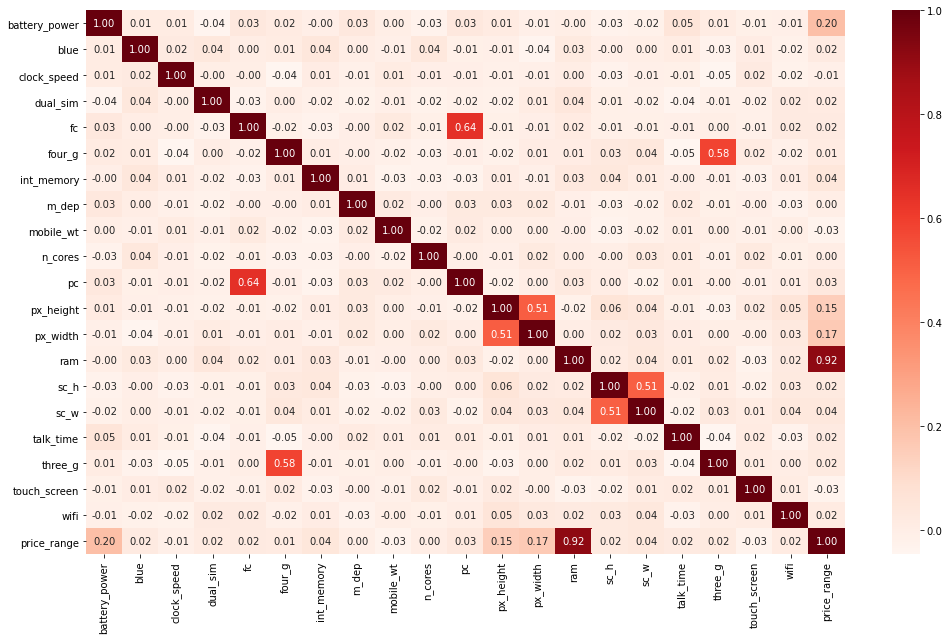

In [8]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Reds')
plt.show()

In [9]:
# lets see the features with high correlation to price range
# we can see that ram was highly correlated to price range

corr['price_range'].drop(['price_range']).sort_values(ascending=False)

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

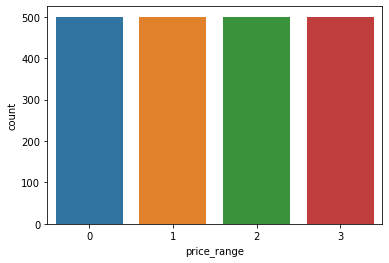

In [10]:
# distribution of price range 
# 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

sns.countplot(x='price_range', data=df)
plt.show()

## Lets explore categorical variables

### Distribution of data based on ram

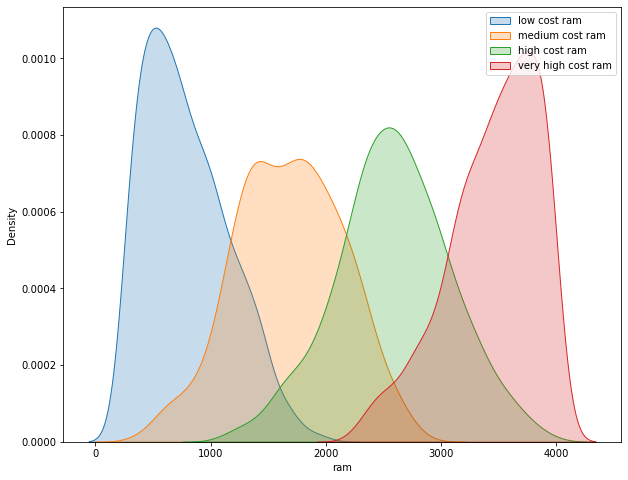

In [11]:
plt.figure(figsize=(10,8))
sns.kdeplot(df[df['price_range']==0]['ram'],shade=True)
sns.kdeplot(df[df['price_range']==1]['ram'],shade=True)
sns.kdeplot(df[df['price_range']==2]['ram'],shade=True)
sns.kdeplot(df[df['price_range']==3]['ram'],shade=True)
plt.legend(['low cost ram','medium cost ram','high cost ram','very high cost ram'])
plt.show()

### Bluetooth and Price range

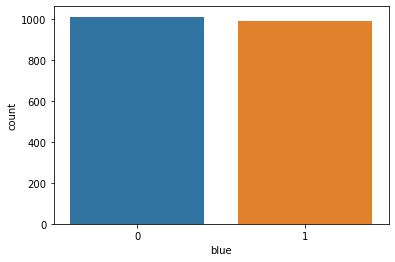

In [12]:
sns.countplot(x='blue',data=df)
plt.show()

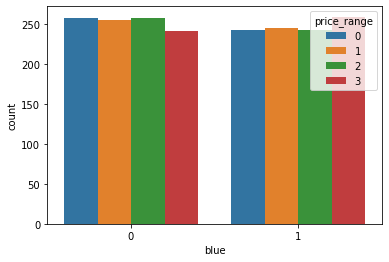

In [13]:
# in this case, having or not having bluetooth cant predict the price_range

sns.countplot(x='blue',hue='price_range',data=df)
plt.show()

### Dual sim feature and Phone range

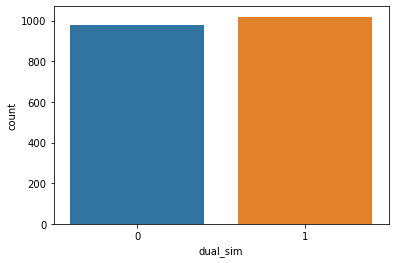

In [14]:
sns.countplot(x='dual_sim',data=df)
plt.show()

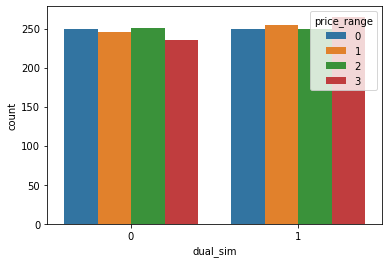

In [15]:
# the distribution of price ranges in phone with and without dual sim feature are equal hence 
# it is too hard to classify the price range

sns.countplot(x='dual_sim',hue='price_range',data=df)
plt.show()

### phone is 4g and price range

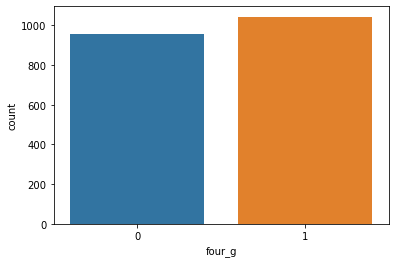

In [16]:
sns.countplot(x='four_g',data=df)
plt.show()

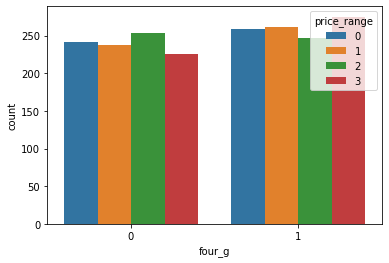

In [17]:
# same case as above

sns.countplot(x='four_g',hue='price_range',data=df)
plt.show()

### Number of core processors and price range

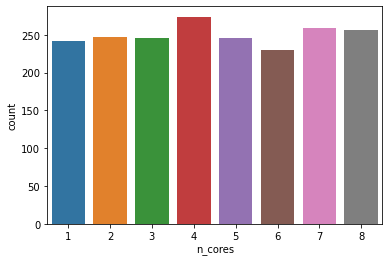

In [18]:
sns.countplot(x='n_cores',data=df)
plt.show()

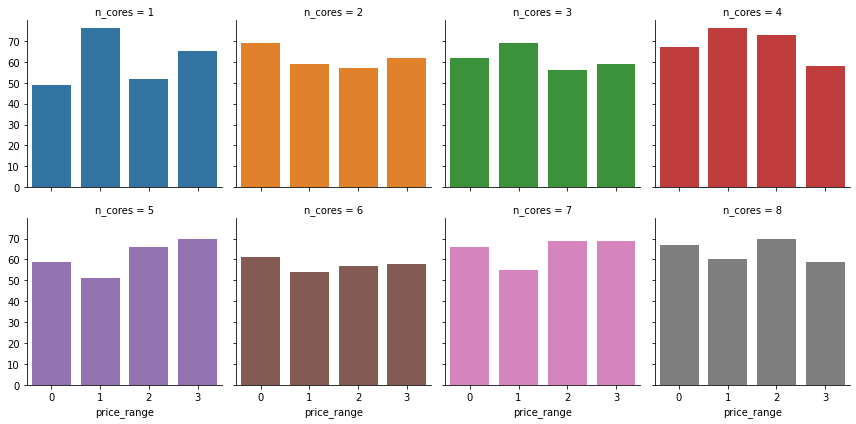

In [19]:
n_cores = sns.FacetGrid(df, col = "n_cores",hue='n_cores',col_wrap=4)
n_cores.map(sns.countplot,'price_range',order=[0,1,2,3])
plt.show()

### Phone is 3g and price range

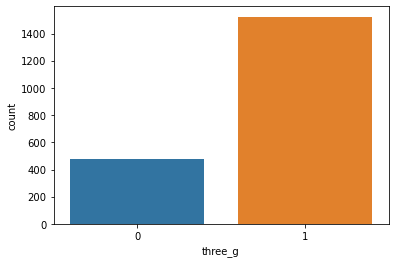

In [20]:
sns.countplot(x='three_g',data=df)
plt.show()

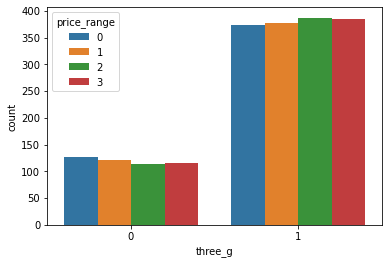

In [21]:
# distribution of price range is also equal

sns.countplot(x='three_g',hue='price_range',data=df)
plt.show()

### Touchscreen phone and price range

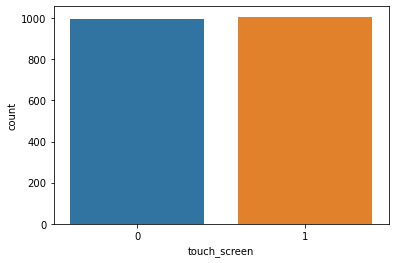

In [22]:
sns.countplot(x='touch_screen',data=df)
plt.show()

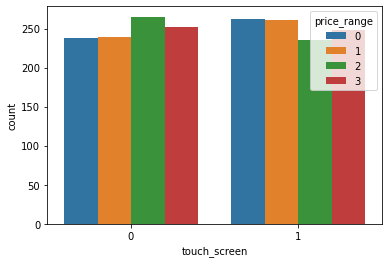

In [23]:
sns.countplot(x='touch_screen',hue='price_range',data=df)
plt.show()

### Wifi and Price range

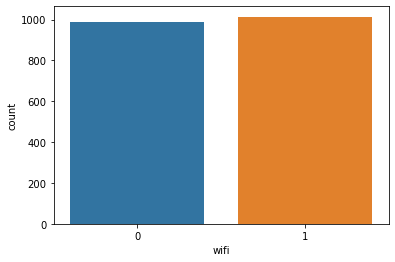

In [24]:
sns.countplot(x='wifi',data=df)
plt.show()

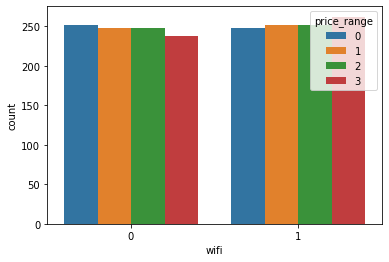

In [25]:
sns.countplot(x='wifi',hue='price_range',data=df)
plt.show()

## Top 5 features with highest correlation to target variable

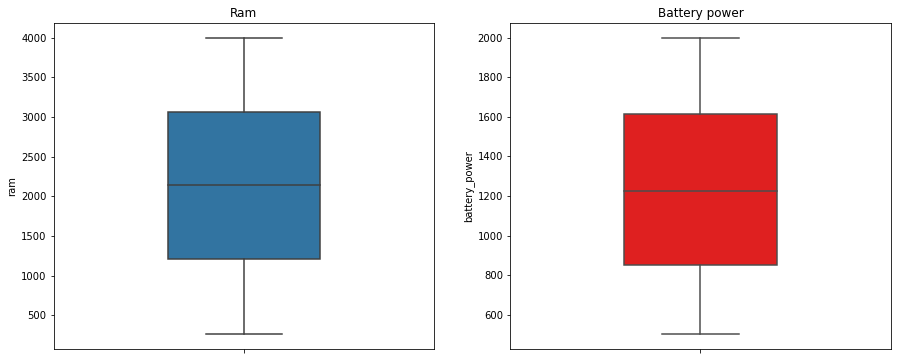

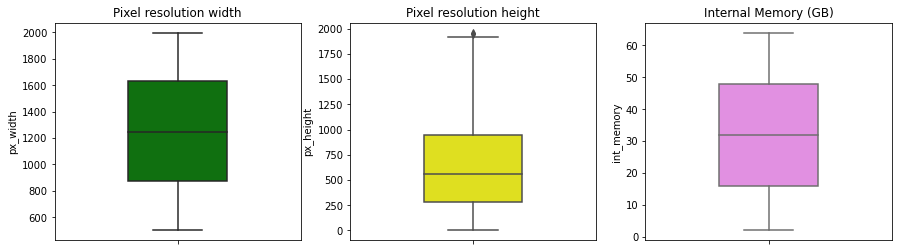

In [26]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.boxplot(y='ram',data=df,width=0.4,ax=ax[0])
sns.boxplot(y='battery_power',data=df,width=0.4,ax=ax[1],color='red')
ax[0].set_title('Ram')
ax[1].set_title('Battery power')
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,4))
sns.boxplot(y='px_width',data=df,width=0.4,ax=ax[0],color='green')
sns.boxplot(y='px_height',data=df,width=0.4,ax=ax[1],color='yellow')
sns.boxplot(y='int_memory',data=df,width=0.4,ax=ax[2],color='violet')
ax[0].set_title('Pixel resolution width')
ax[1].set_title('Pixel resolution height')
ax[2].set_title('Internal Memory (GB)')
plt.show()

In [27]:
# we can see the minimum pixel resolution in height is 0
df[['ram','battery_power','px_width','px_height','int_memory']].describe().T

,count,mean,std,min,25%,50%,75%,max
ram,2000.0,2124.2130,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
px_width,2000.0,1251.5155,432.199447,500.0,874.75,1247.0,1633.00,1998.0
px_height,2000.0,645.1080,443.780811,0.0,282.75,564.0,947.25,1960.0
int_memory,2000.0,32.0465,18.145715,2.0,16.00,32.0,48.00,64.0


In [28]:
# we will drop all the rows with px_height less than 75
df1 = df[df['px_height']>75]

# Model building

* i will only consider the top five features with high correlation to target variable
* i didnt include categorical value since most of them have equal distribution for price ranges

In [29]:
df2 = df1[['ram','battery_power','px_width','px_height','int_memory','price_range']]

In [30]:
df2.shape

(1895, 6)

In [31]:
df2.head()

,ram,battery_power,px_width,px_height,int_memory,price_range
1,2631,1021,1988,905,53,2
2,2603,563,1716,1263,41,2
3,2769,615,1786,1216,10,2
4,1411,1821,1212,1208,44,1
5,1067,1859,1654,1004,22,1


## Separate independent variable to target variable

In [32]:
X = df2.drop(['price_range'],axis=1)
y = df2['price_range']

In [33]:
X.head()

,ram,battery_power,px_width,px_height,int_memory
1,2631,1021,1988,905,53
2,2603,563,1716,1263,41
3,2769,615,1786,1216,10
4,1411,1821,1212,1208,44
5,1067,1859,1654,1004,22


In [34]:
y.head()

1    2
2    2
3    2
4    1
5    1
Name: price_range, dtype: int64

## Knn Algorithm 

In [35]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [37]:
print('Length of train dataset: ',len(X_train))
print('Length of test dataset: ',len(X_test))

Length of train dataset:  1326
Length of test dataset:  569


### Scale first the data

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Applying the algorithm

In [39]:
knn_model = KNeighborsClassifier()
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [40]:
y_predicted = knn_model.predict(scaled_X_test)

### Confusion matrix and Classification Report

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [42]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[124,  15,   0,   0],
       [ 14, 104,  19,   0],
       [  0,  20, 123,   9],
       [  0,   0,  19, 122]], dtype=int64)

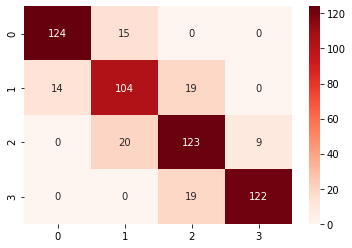

In [43]:
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f')
plt.show()

In [44]:
print('KNN accuracy score: ',accuracy_score(y_test,y_predicted))

KNN accuracy score:  0.8312829525483304


In [45]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       139
           1       0.75      0.76      0.75       137
           2       0.76      0.81      0.79       152
           3       0.93      0.87      0.90       141

    accuracy                           0.83       569
   macro avg       0.84      0.83      0.83       569
weighted avg       0.83      0.83      0.83       569



# Find best model using GridSearchCV

* I will create seperate pipelines for each model for gridsearchcv rather than a script with all the models on it

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline

## Logistic Regression

In [47]:
pipe = make_pipeline(MinMaxScaler(),LogisticRegression())
grid_param = [
                {
                    'logisticregression': [LogisticRegression()],
                    'logisticregression__C': [0.8,1,1.2]
                }
]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

print(best_model.best_estimator_)
print('\nThe mean accuracy using Logistic Regression is: ',best_model.score(X_test,y_test))

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(C=1.2))])

The mean accuracy using Logistic Regression is:  0.9332161687170475


## SVM

In [48]:
pipe = make_pipeline(SVC())
grid_param = [
                {
                    'svc': [SVC()],
                    'svc__kernel': ['linear','rbf']
                }
]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

print(best_model.best_estimator_)
print('\nThe mean accuracy using SVM is: ',best_model.score(X_test,y_test))

Pipeline(steps=[('svc', SVC(kernel='linear'))])

The mean accuracy using SVM is:  0.9543057996485061


## Decision Tree

In [49]:
pipe = make_pipeline(DecisionTreeClassifier())
grid_param = [
                {
                    'decisiontreeclassifier': [DecisionTreeClassifier()],
                    'decisiontreeclassifier__splitter': ['best','random'],
                    'decisiontreeclassifier__min_samples_split': range(2,20)
                }
]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

print(best_model.best_estimator_)
print('\nThe mean accuracy using Decision Tree is: ',best_model.score(X_test,y_test))

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=6))])

The mean accuracy using Decision Tree is:  0.8330404217926186


## Random Forest

In [50]:
pipe = make_pipeline(RandomForestClassifier())
grid_param = [
                {
                    'randomforestclassifier': [RandomForestClassifier()],
                    'randomforestclassifier__n_estimators': range(11,51,5),
                    'randomforestclassifier__min_samples_split': range(2,20)
                }
]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

print(best_model.best_estimator_)
print('\nThe mean accuracy using Random Forest is: ',best_model.score(X_test,y_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=3, n_estimators=46))])

The mean accuracy using Random Forest is:  0.8963093145869947


### We can see that SVM gives us the highest accuracy

In [51]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [52]:
y_predicted = svm_model.predict(X_test)

In [53]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[136,   3,   0,   0],
       [  1, 134,   2,   0],
       [  0,   7, 139,   6],
       [  0,   0,   7, 134]], dtype=int64)

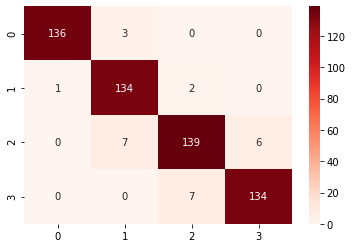

In [54]:
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f')
plt.show()

In [55]:
print('SVM accuracy score: ',accuracy_score(y_test,y_predicted))

SVM accuracy score:  0.9543057996485061


In [56]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       139
           1       0.93      0.98      0.95       137
           2       0.94      0.91      0.93       152
           3       0.96      0.95      0.95       141

    accuracy                           0.95       569
   macro avg       0.95      0.96      0.95       569
weighted avg       0.95      0.95      0.95       569



### Saving the model

In [57]:
import pickle

In [58]:
pickle.dump(svm_model,open('mobile_price_model.pickle','wb'))

In [59]:
# try to load the model

model = pickle.load(open('mobile_price_model.pickle','rb'))

In [60]:
# ram(megabytes), battery power, px_width, px_height, internal memory in gigabytes

model.predict([[3000,2500,1260,720,8]])

array([3], dtype=int64)